# 1. 데이터 수집 및 로딩

In [125]:
df = pd.read_csv('data/apple_quality.csv')

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.데이터 구조 및 변수 이해
| 컬럼 이름    | 자료형    | 한글 이름    | 타입        | 역할      | 설명                      |
|--------------|-----------|--------------|-------------|-----------|---------------------------|
| A_id         | float64   | 과일 ID      | 수치형      | Feature   | 고유 식별자               |
| Size         | float64   | 크기         | 수치형      | Feature   | 과일의 크기               |
| Weight       | float64   | 무게         | 수치형      | Feature   | 과일의 무게               |
| Sweetness    | float64   | 당도         | 수치형      | Feature   | 과일의 단맛 정도          |
| Crunchiness  | float64   | 아삭함       | 수치형      | Feature   | 과일의 아삭한 정도        |
| Juiciness    | float64   | 과즙 함량    | 수치형      | Feature   | 과일의 즙이 많은 정도     |
| Ripeness     | float64   | 숙성도       | 수치형      | Feature   | 과일의 익은 정도          |
| Acidity      | object    | 산도         | 범주형      | Feature   | 과일의 신맛 정도 (Low, Medium 등) |
| Quality      | object    | 품질         | 범주형      | Target    | 과일의 품질 평가 (Good, Bad 등)   |

In [127]:
print(df.head())
print(df.info())


   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juicin

# 3.데이터 요약 및 기술 통계

In [128]:
print(df.describe())
print(df['Acidity'].value_counts())
print(df['Quality'].value_counts())

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75% 

# 4. 결측치 및 이상치 탐지 , 8. 데이터 전처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


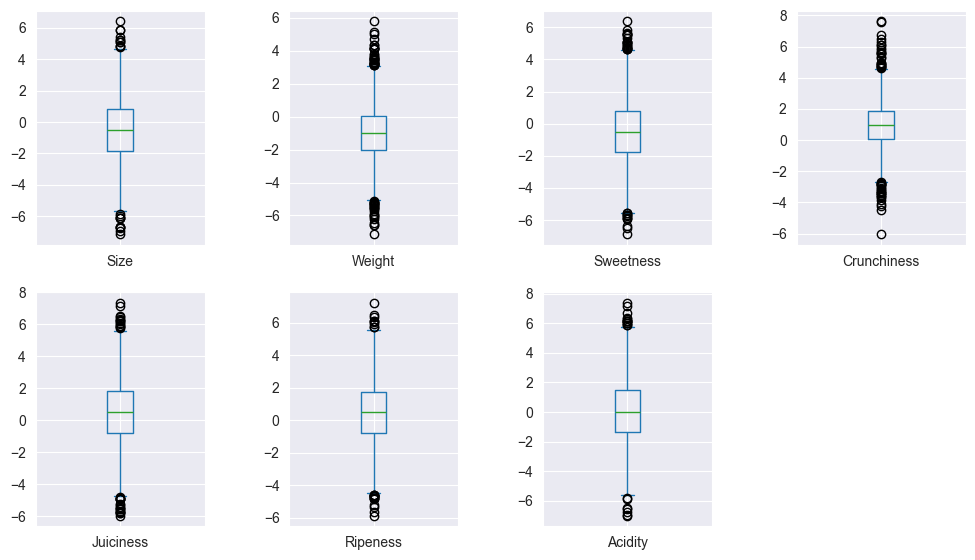

In [129]:
df= df.drop('A_id', axis=1)
# df['Acidity'] = df['Acidity'].str.replace(',', '.').astype(float)
df.info()

#  결측치 X , 이상치 탐지 -> box_polt
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);
plt.show()



# 5. 변수, 분포 시각화

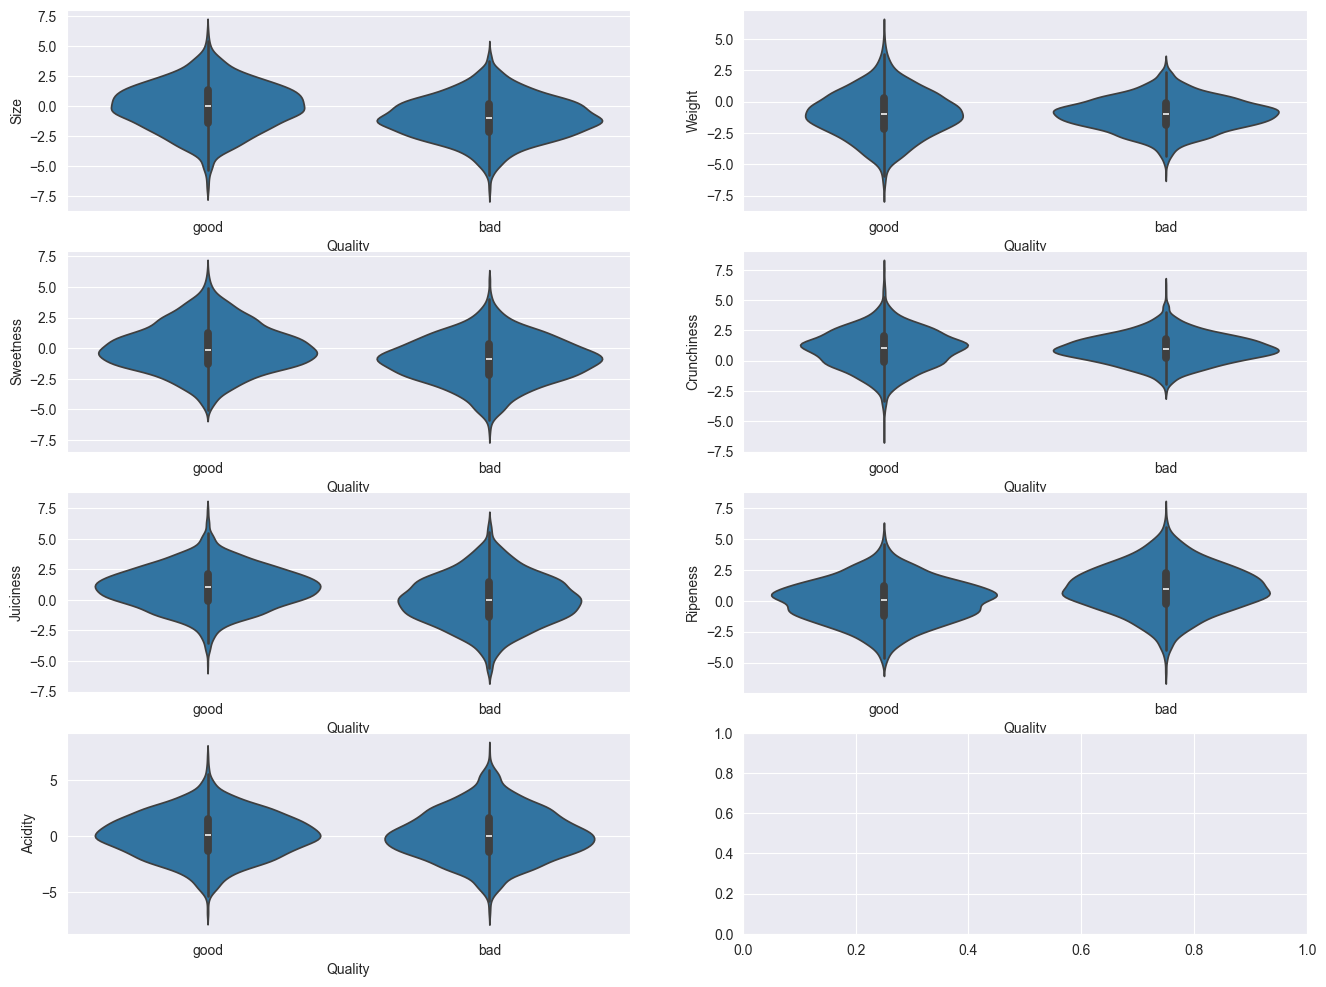

In [130]:

fig, ax = plt.subplots(4,2, figsize=(16,12))
feature_names = df.columns[:-1]

for i, feature in enumerate(feature_names):
    row = i // 2
    col = i % 2
    sns.violinplot(x='Quality', y =feature, data= df, ax=ax[row, col])

plt.show()


# 6. 변수 간 관계 시각화

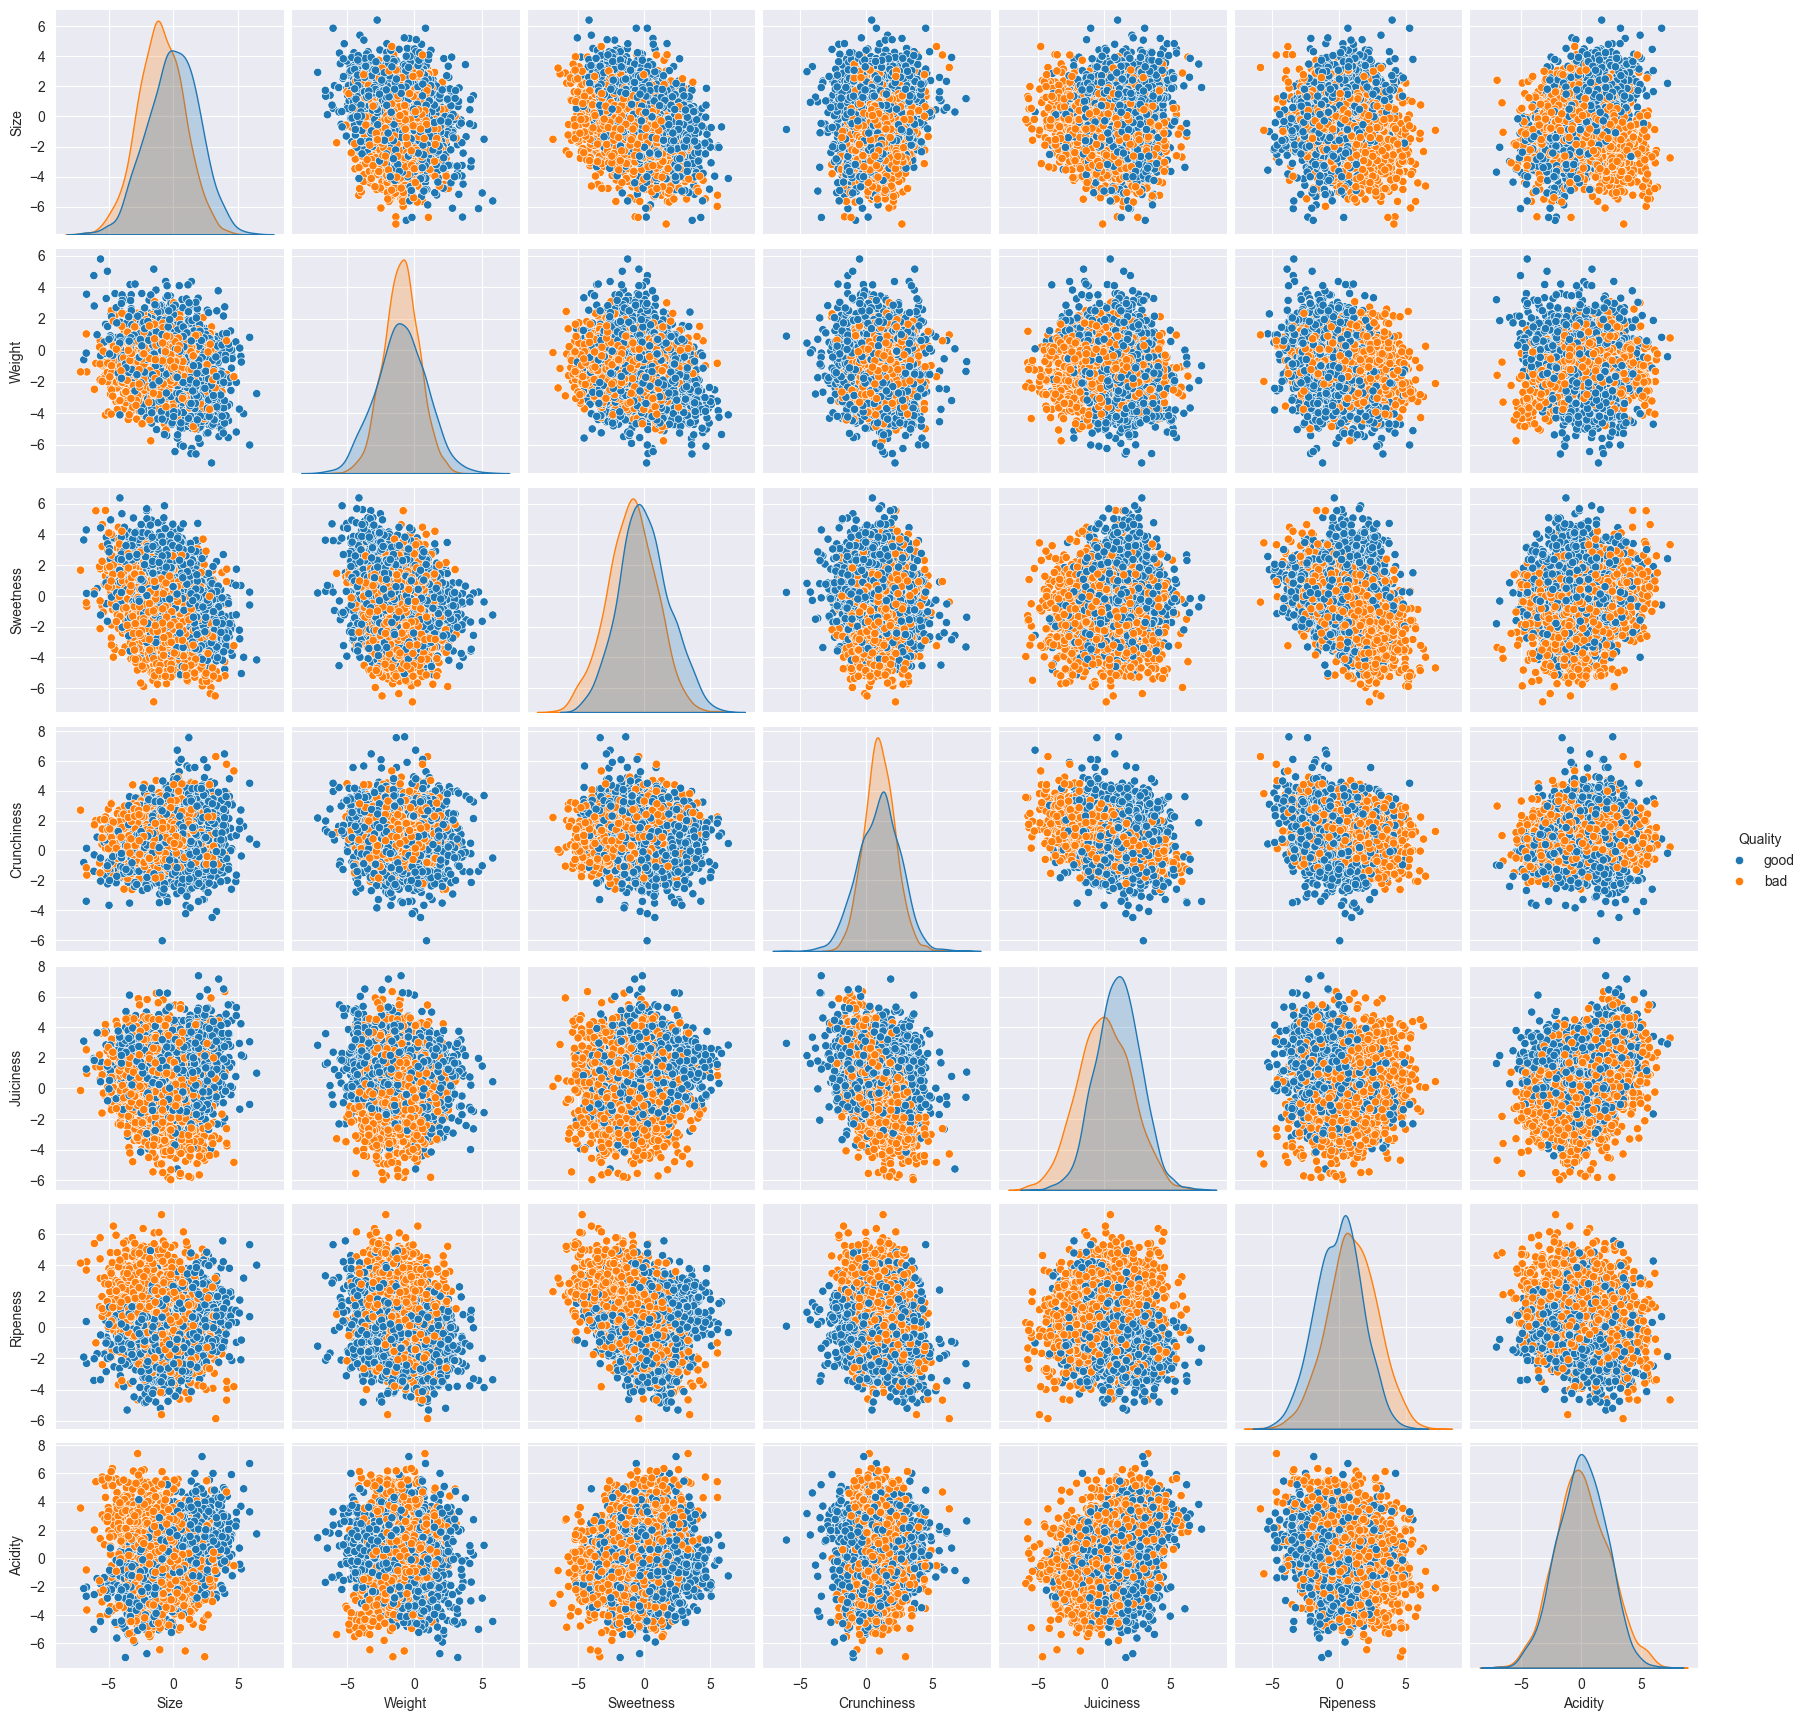

In [132]:
sns.pairplot(df, hue='Quality')

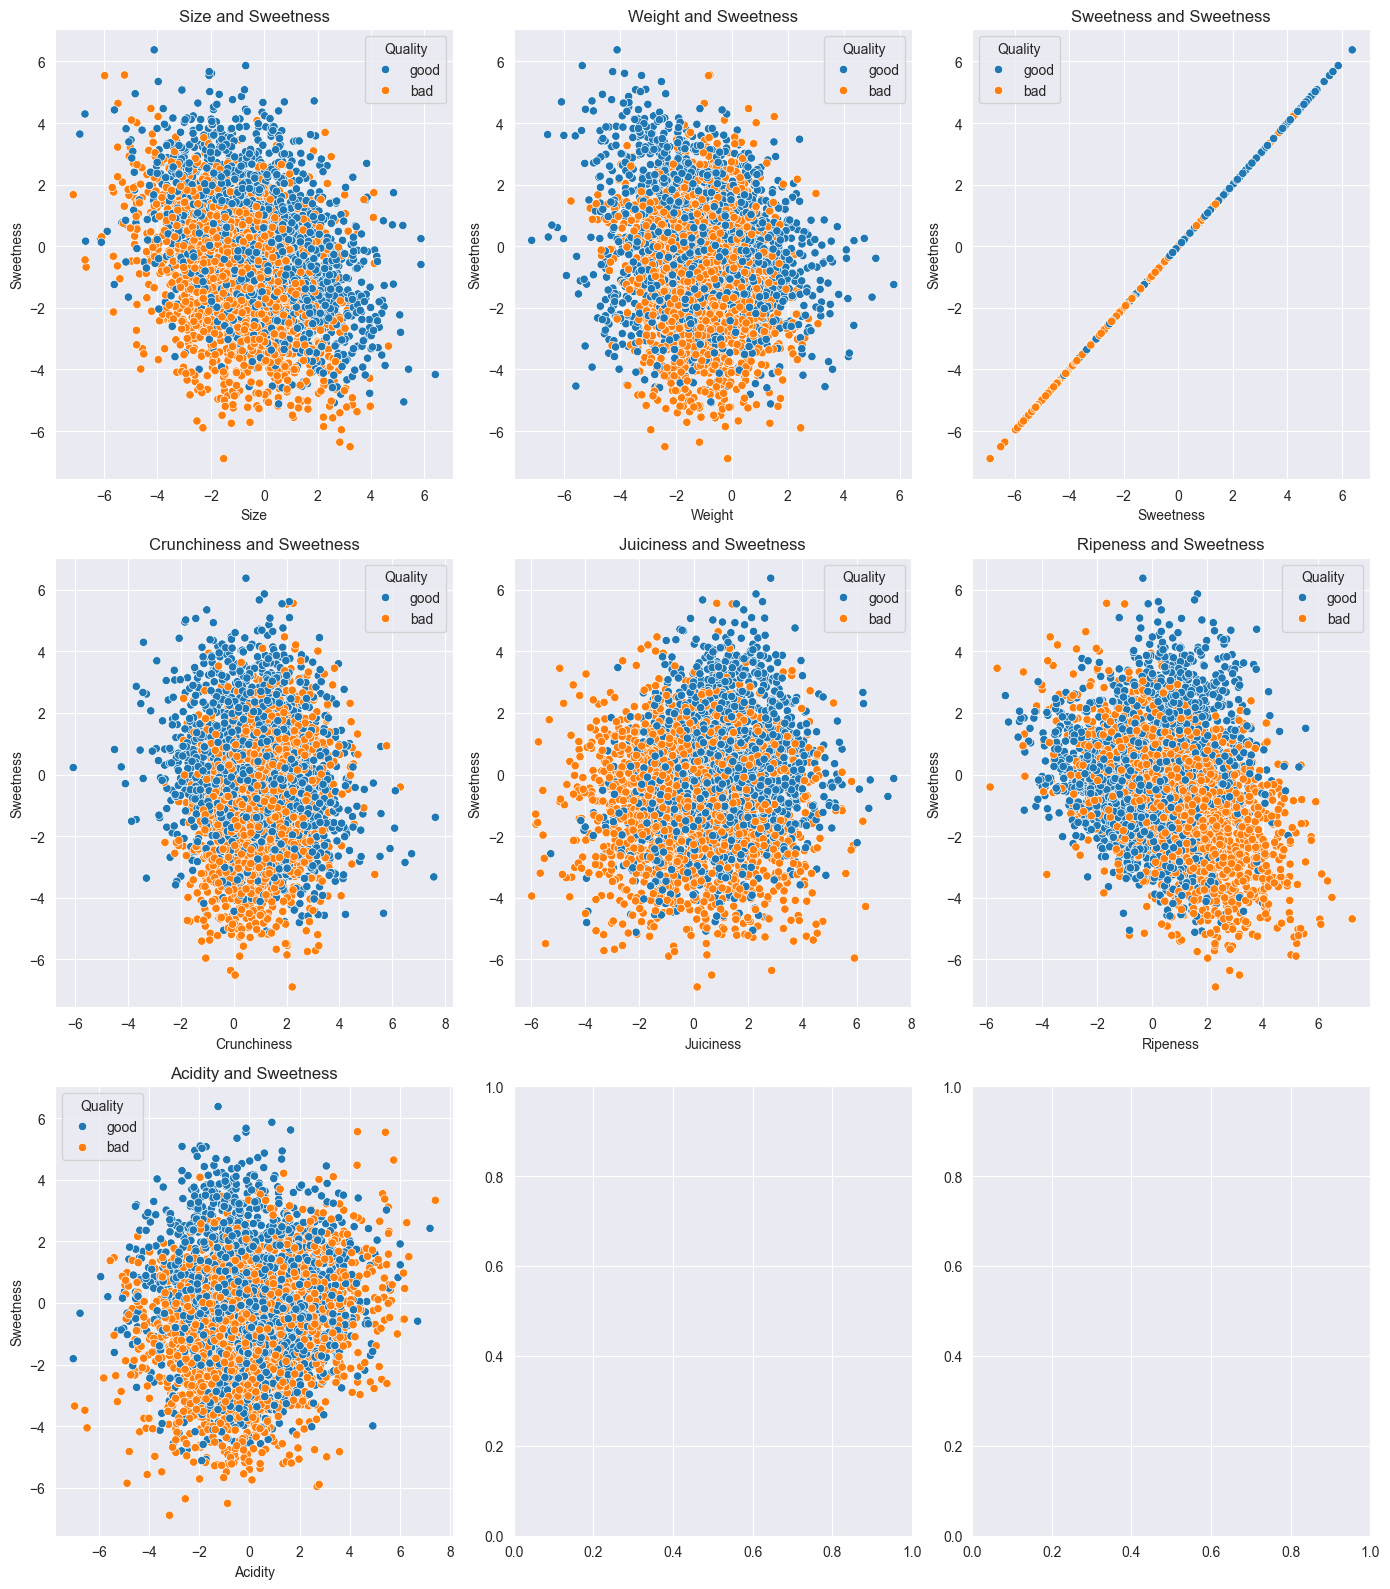

In [133]:
x_values = df.select_dtypes(include=['number'])

fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(14, 16))
y_value = 'Sweetness'

for ax, x_value in zip(axis.flat, x_values):
    sns.scatterplot(data=df, x=x_value, y=y_value, hue='Quality', ax=ax)
    ax.set_title(f'{x_value.capitalize()} and {y_value.capitalize()}')

plt.tight_layout()
plt.show()

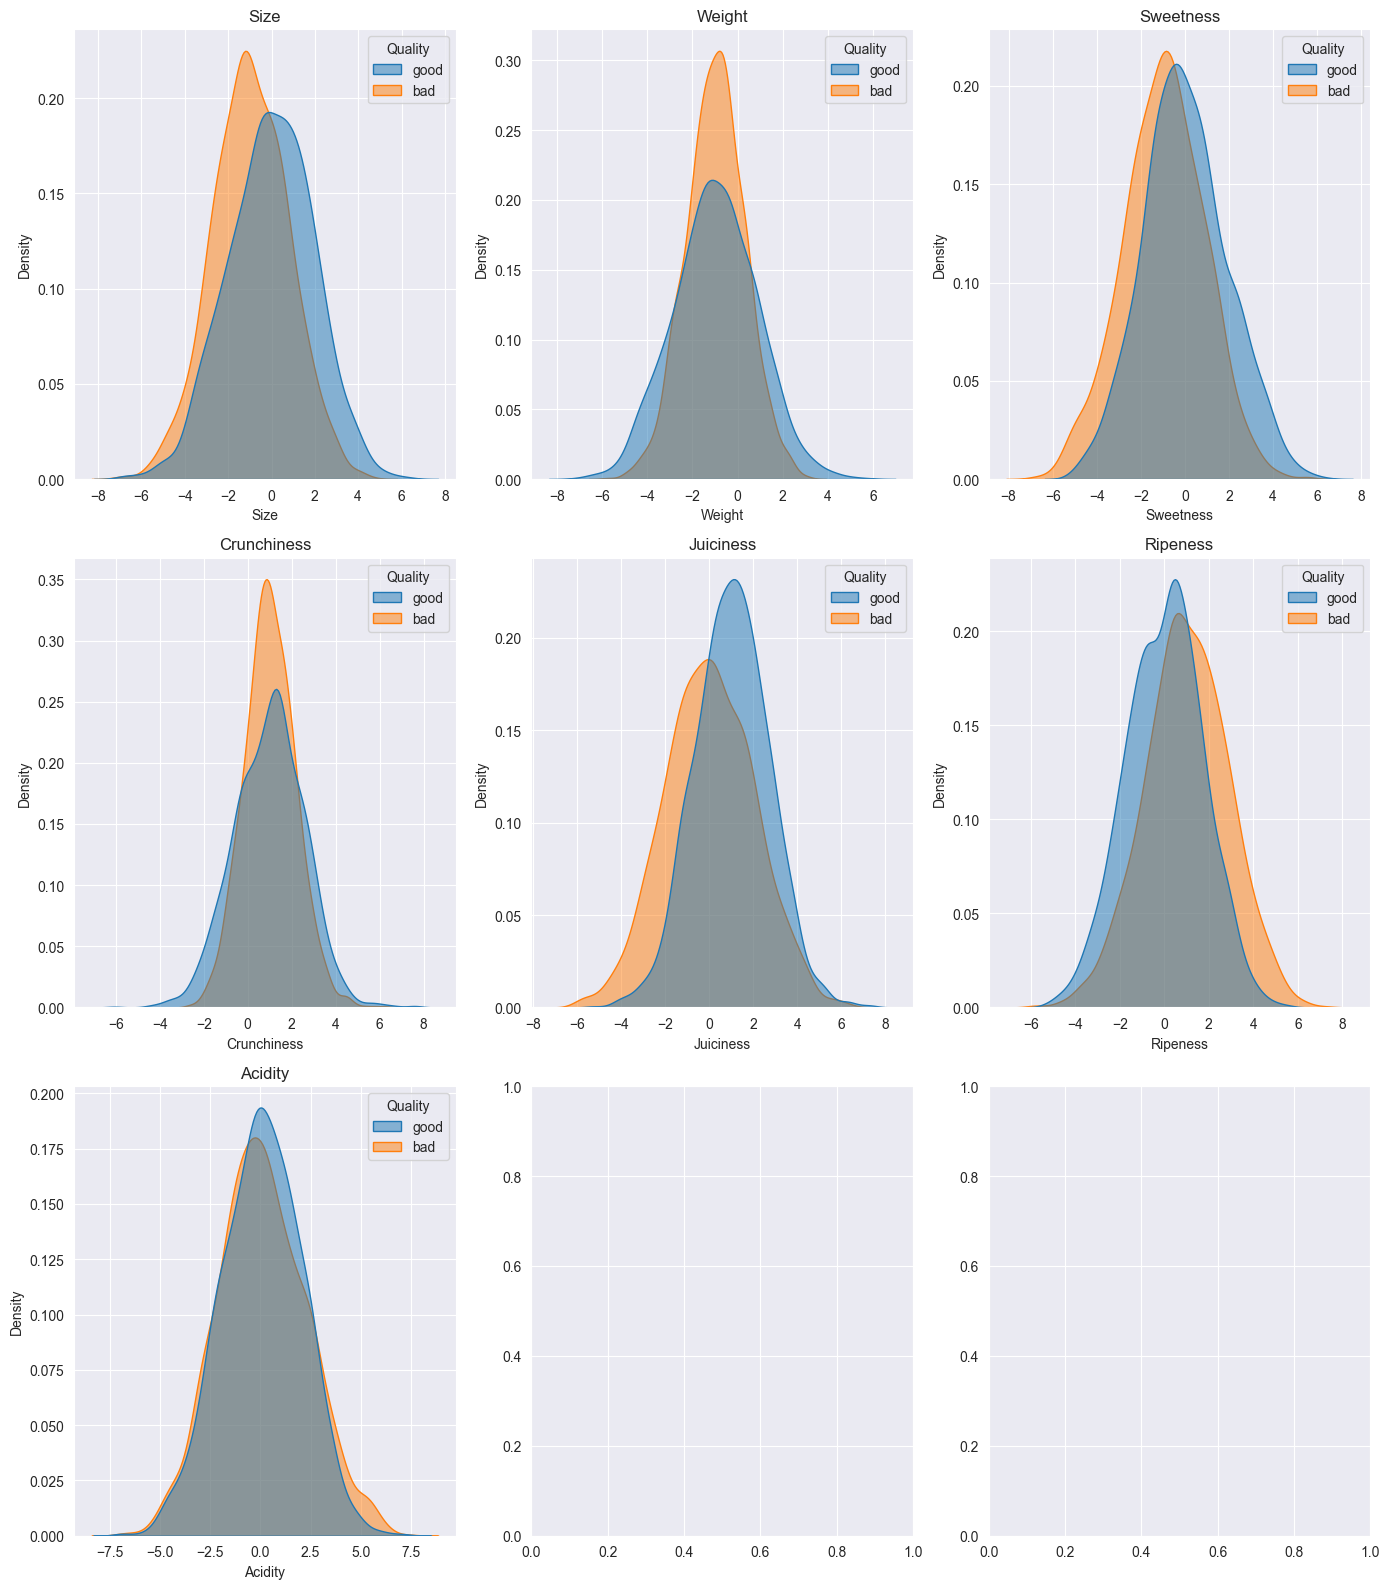

In [134]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(14, 16))

for ax, x_value in zip(axis.flat, x_values):
    sns.kdeplot(data=df, x=x_value, fill=True,hue='Quality', common_norm=False, alpha=0.5, ax=ax)
    ax.set_title(f'{x_value.capitalize()}')
plt.tight_layout()
plt.show()

<scatterplot>
1. size ↑ → quality↑
2. weight ↑ or ↓  → quality↑
3. sweetness ↑ → quality↑
4. X
5. juiciness ↑ and sweetness ↑ → quality↑
6. ripness ↓ and sweetness ↓  → quality↓
7. X

<kedplot>
2. 무게가 중앙에 가까울수록 품질 나쁨이 많다.
4. 아삭함이 중앙에 가까울수록 품질 나쁨이 많다.
5. 과즙함량이 중앙보다 살짝 높은 수치의 품질 좋음이 많다.
6. 숙성도가 중앙보다 살짝 낮은 수치의 품질 나쁨이 많다.


# 7. 상관관계 및 교차분석

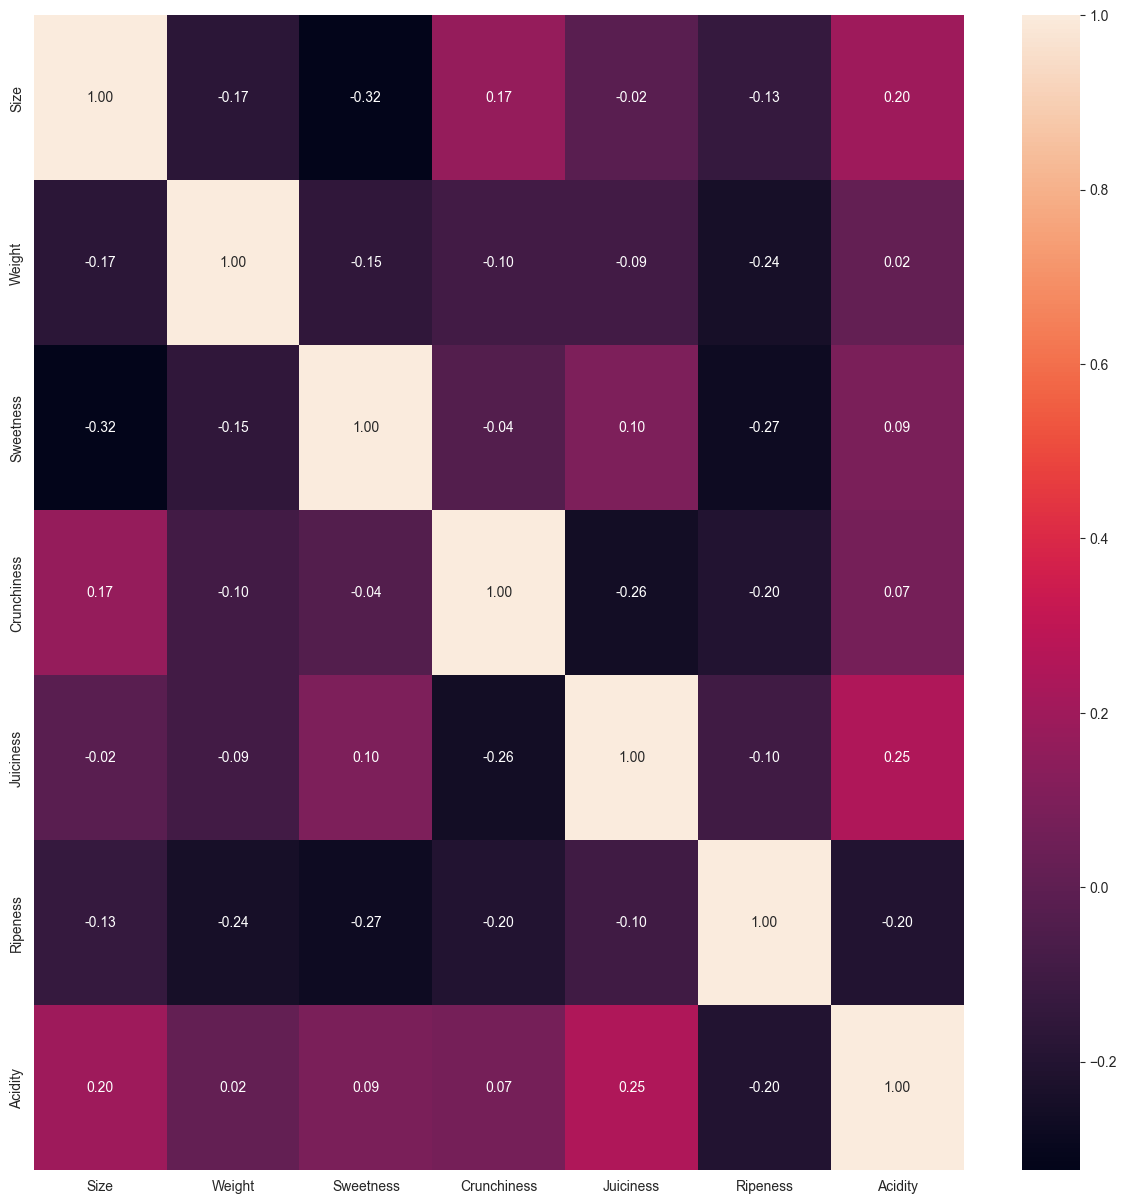

In [135]:
corr_mat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, fmt='.2f' )
plt.show()

size는 acidity 양의 관계, sweetness와 음의 관계
weight는  ripeness와 음의 관계
sweetness는 size, ripeness와 음의 관계
crunchiness는 juiciness, ripeness와 음의 관계
juiciness는 crunchiness, acidity와 음의 관계
ripeness는 weight, sweetness, crunchness, acidity와 음의 관계
acidity는 size, juiciness와 양의관계, ripeness와 음의 관계

# 9. Feature Engineering

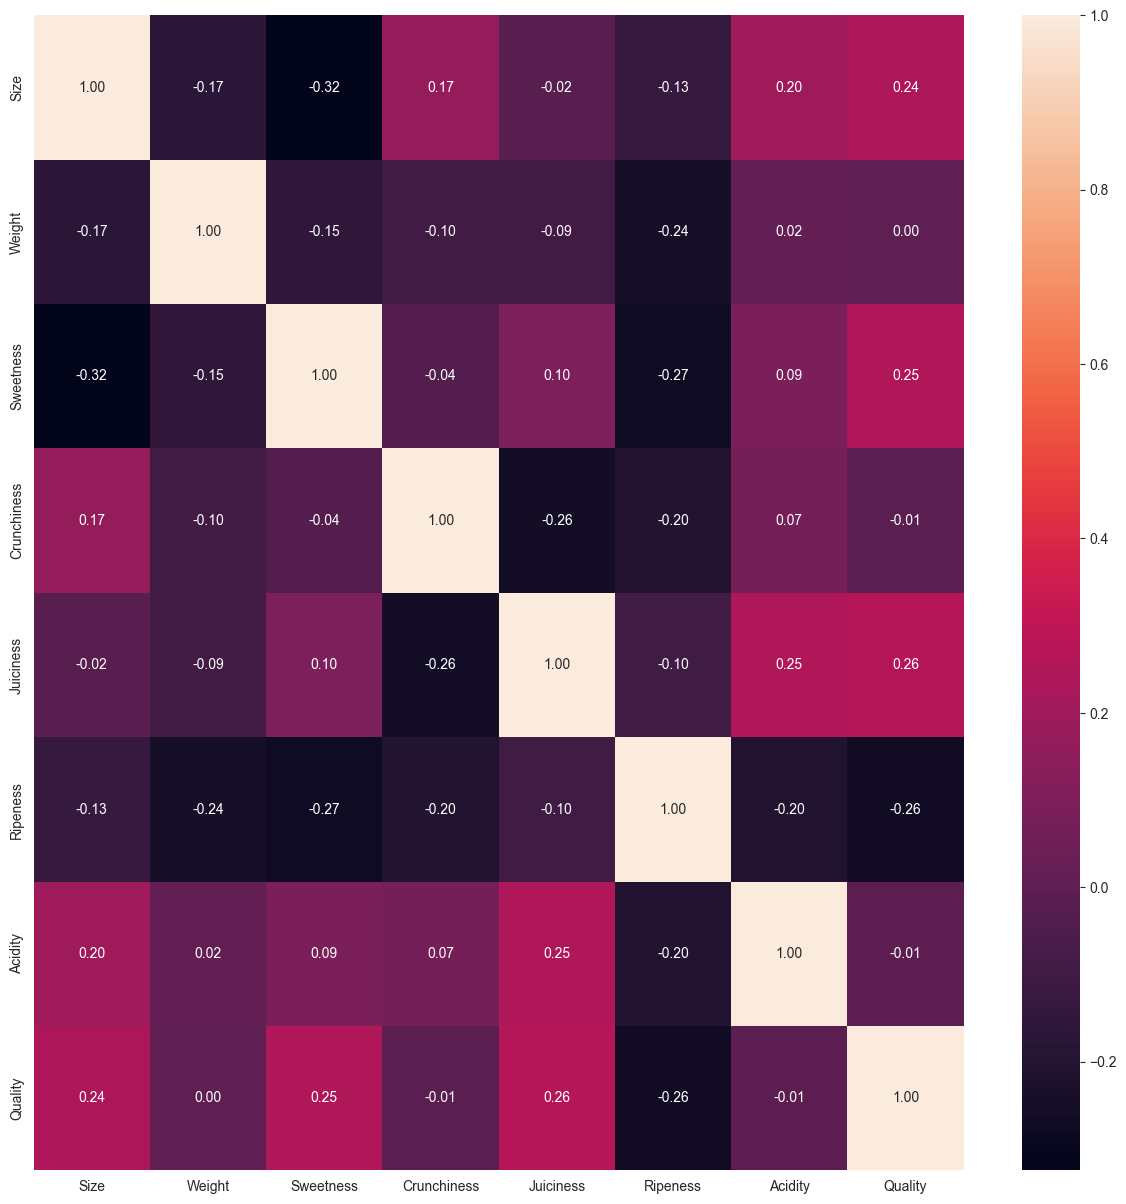

In [136]:
# quality를 정수형으로 바꿔서 다른 요소들과의 상관관계도 확인해보았다.
df['Quality'] = df['Quality'].map({'bad': 0, 'good': 1})
corr_mat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, fmt='.2f' )
plt.show()

size, sweetness, juiciness 에서 quality와 양의 관계가 있음을 확인.
ripeness에서 quality와 음의 관계가 있음을 확안.

In [137]:
# 양의 관계가 그나마 높게 나타나는 size, sweetness, juiciness를 묶어 새로운 요소를 만들어주고 상관관계 확인

df['Taste_Score'] = df[['Size', 'Sweetness', 'Juiciness']].mean(axis=1)

# 상관계수 확인
correlation = df['Taste_Score'].corr(df['Quality'])
print("Taste_Score vs Quality 상관계수:", correlation)

Taste_Score vs Quality 상관계수: 0.47724927480834567


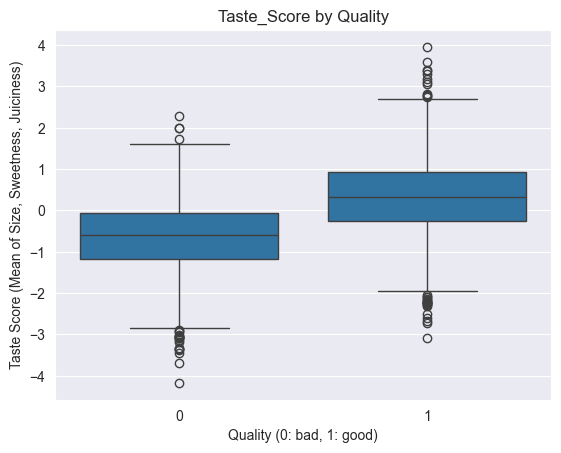

In [138]:
# 이를 시각화
sns.boxplot(x='Quality', y='Taste_Score', data=df)
plt.title("Taste_Score by Quality")
plt.xlabel("Quality (0: bad, 1: good)")
plt.ylabel("Taste Score (Mean of Size, Sweetness, Juiciness)")
plt.show()

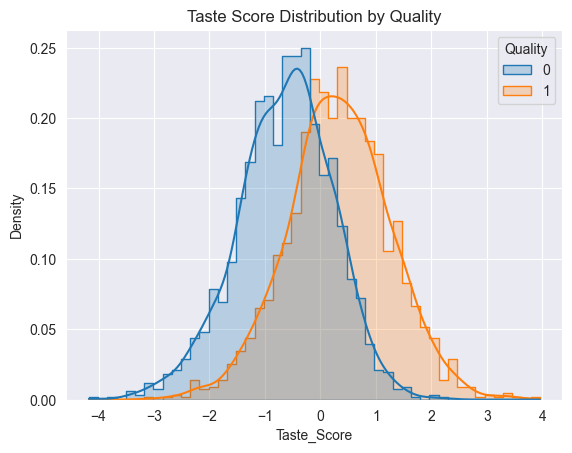

In [139]:
sns.histplot(data=df, x='Taste_Score', hue='Quality', kde=True, element='step', stat='density')
plt.title("Taste Score Distribution by Quality")
plt.show()

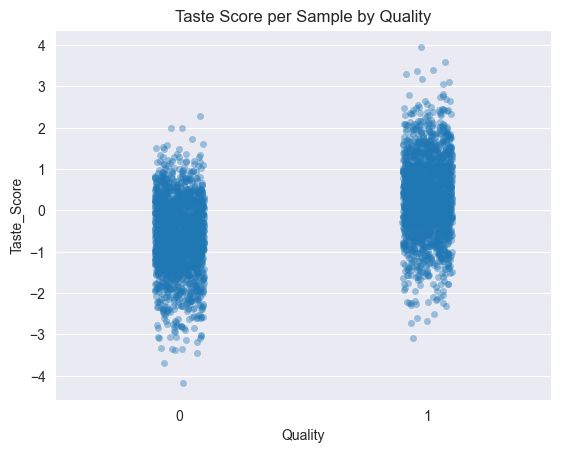

In [140]:
sns.stripplot(x='Quality', y='Taste_Score', data=df, jitter=True, alpha=0.4)
plt.title("Taste Score per Sample by Quality")
plt.show()

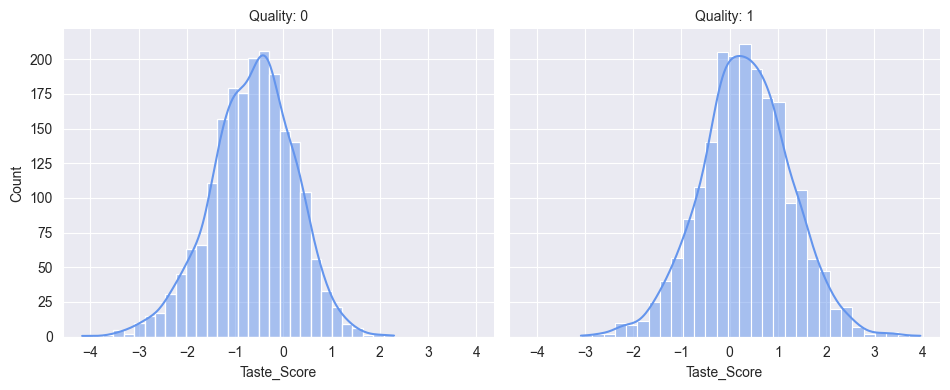

In [141]:
g = sns.FacetGrid(df, col='Quality', height=4, aspect=1.2)
g.map(sns.histplot, 'Taste_Score', bins=30, kde=True, color='cornflowerblue')
g.set_titles(col_template="Quality: {col_name}")
plt.show()

In [142]:
# 로지스틱 회귀 (정량적 관계 검증)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['Size', 'Sweetness', 'Juiciness']]
y = df['Quality']

# 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 로지스틱 회귀 모델
model = LogisticRegression()
model.fit(X_train, y_train)

# 계수 확인
print("회귀계수:", model.coef_)
print("절편:", model.intercept_)

# 예측 결과
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

회귀계수: [[0.49487644 0.49505489 0.31748234]]
절편: [0.3122076]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       495
           1       0.73      0.71      0.72       505

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



# 10. 최종 요약 및 인사이트 도출

-   size, sweetness, juiciness 에서 quality와 양의 관계가 있음을 확인.
-   ripeness에서 quality와 음의 관계가 있음을 확안.

→ 양의 관계가 있는 size, sweetness, juiciness를 묶어 새로운 요소 taste score로 만들어 quality와의 관계를 확인

-   회귀계수: [0.49 (Size), 0.49 (Sweetness), 0.32 (Juiciness)]
절편: 0.31
세 변수 모두 양의 계수 → Size, Sweetness, Juiciness 값이 커질수록 Quality = 1 ("good")일 확률이 증가

-   특히 Size와 Sweetness의 영향력이 거의 같고 큼, Juiciness는 그보다 다소 작음

-   즉, 세 가지 요소 모두 Quality를 높이는 데 기여하며, 특히 크기와 단맛이 중요하다는 것을 의미

-   모델 성능 요약 (정확도: 72%)
지표	설명	0 (bad)	1 (good)
Precision	예측이 맞은 비율 (정밀도)	71%	73%
Recall	실제 값을 잘 맞춘 비율 (재현율)	73%	71%
F1-Score	정밀도/재현율 종합	72%	72%

-   정확도 (accuracy): 72%

-   bad와 good 모두에서 성능이 균형 잡혀 있음

-   과도한 과적합 없이, 비교적 예측 잘 됨

-   Size, Sweetness, Juiciness가 클수록 사과의 품질(Quality)이 좋아질 확률이 높음

-   로지스틱 회귀 모델은 72% 정확도로 Quality를 예측할 수 있음

-   특히 Size와 Sweetness가 품질 판별에 강한 영향력을 미침

-   품질 판별은 양쪽 클래스에 대해 균형 잡힌 성능을 보임